In [128]:
# Import Dataframe and Processing Libraries
import pandas as pd
from collections import Counter

# Import Data Visulisation Libraries
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

plt.style.use('ggplot')

# set jupyter's max row display
pd.set_option('display.max_row', 1000)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

In [79]:
# Read and import csv as dataframe
data = pd.read_csv("C:/Users/James Stuart-Smith/PycharmProjects/nlp-web-scrapping/data/actual/cleanedData.csv")
data.head()

,user,message_id,sentiment,content,date,time,securities,tweet text,tokens,num_of_tokens,tokens_in_transformed_text,num_of_tokens_in_transformed_text
0,babybounce,/babybounce/message/226382374,Bullish,$BA travel going green bullish $CCL $RCL $NCLH...,09/07/2020,12:21:03,"['$BA', '$CCL', '$RCL', '$NCLH', '$SPY']",travel going green bullish,"['travel', 'going', 'green', 'bullish']",4,"['travel', 'go', 'green', 'bullish']",4
1,L1_Trading,/L1_Trading/message/226381562,Bullish,$SPY let’s go mooning today,09/07/2020,12:21:03,['$SPY'],let’s go mooning today,"['let', 'go', 'mooning', 'today']",4,"['let', 'go', 'moon', 'today']",4
2,Economist4401,/Economist4401/message/226381511,Bearish,$SPY $SPX $DJIA $DIA $QQQ Analysts on US stock...,09/07/2020,12:21:03,"['$SPY', '$SPX', '$DJIA', '$DIA', '$QQQ']","Analysts on US stock markets: 1. On Monday, Bl...","['analysts', 'us', 'stock', 'markets', 'monday...",58,"['analyst', 'us', 'stock', 'market', 'monday',...",37
3,OkieOkie,/OkieOkie/message/226381256,Bearish,$SPY more China. China wants some of Australia...,09/07/2020,12:21:03,['$SPY'],more China. China wants some of Australia lol🦘🦘🦘🦘,"['china', 'china', 'wants', 'australia', 'lol']",8,"['china', 'china', 'want', 'australia', 'lol']",5
4,risksavage_inthemarket,/risksavage_inthemarket/message/226381105,Bullish,$GNLN $CGC $SPY $KERN $PM “What Does The Insti...,09/07/2020,12:21:03,"['$GNLN', '$CGC', '$SPY', '$KERN', '$PM']",“What Does The Institutional Ownership Tell Us...,"['institutional', 'ownership', 'tell', 'us', '...",80,"['institutional', 'ownership', 'tell', 'us', '...",45


In [80]:
# Create two boolean tables for bullish and bearish
bullish_tweet_class =  data['sentiment']=='Bullish'

bearish_tweet_class =  data['sentiment']=='Bearish'
bearish_tweet_class.head()

0    False
1    False
2     True
3     True
4    False
Name: sentiment, dtype: bool

In [81]:
# Create two seperate tables for bullish and bearish data
bullish_data = data[bullish_tweet_class]

bearish_data = data[bearish_tweet_class]
bearish_data.head()

,user,message_id,sentiment,content,date,time,securities,tweet text,tokens,num_of_tokens,tokens_in_transformed_text,num_of_tokens_in_transformed_text
2,Economist4401,/Economist4401/message/226381511,Bearish,$SPY $SPX $DJIA $DIA $QQQ Analysts on US stock...,09/07/2020,12:21:03,"['$SPY', '$SPX', '$DJIA', '$DIA', '$QQQ']","Analysts on US stock markets: 1. On Monday, Bl...","['analysts', 'us', 'stock', 'markets', 'monday...",58,"['analyst', 'us', 'stock', 'market', 'monday',...",37
3,OkieOkie,/OkieOkie/message/226381256,Bearish,$SPY more China. China wants some of Australia...,09/07/2020,12:21:03,['$SPY'],more China. China wants some of Australia lol🦘🦘🦘🦘,"['china', 'china', 'wants', 'australia', 'lol']",8,"['china', 'china', 'want', 'australia', 'lol']",5
7,DannETrader,/DannETrader/message/226380472,Bearish,$SPY yesterday was last day of FED repo’s. It ...,09/07/2020,12:21:03,['$SPY'],yesterday was last day of FED repo’s. It isn’t...,"['yesterday', 'last', 'day', 'fed', 'repo', 'i...",12,"['yesterday', 'last', 'day', 'feed', 'repo', '...",8
12,risksavage_inthemarket,/risksavage_inthemarket/message/226382588,Bearish,$SPY $TSLA $BA $JPM $ZM GRAB A NOTEPAD!!! \r\n...,09/07/2020,12:21:34,"['$SPY', '$TSLA', '$BA', '$JPM', '$ZM']",GRAB A NOTEPAD!!! Investing101 FB@risksavagema...,"['grab', 'notepad', 'investing101', 'fb', 'wat...",8,"['grab', 'notepad', 'investing101', 'fb', 'wat...",8
15,ihavespoken,/ihavespoken/message/226383179,Bearish,$SPY 900 point drop in crude coming,09/07/2020,12:25:38,['$SPY'],900 point drop in crude coming,"['point', 'drop', 'crude', 'ing']",5,"['point', 'drop', 'crude', 'ing']",4


In [82]:
# count occurences of words of value
bullish_words = [word for tweet in bullish_data['securities'] for word in tweet.replace(",", "").replace("[", "").replace("]", "").replace("'", "").split(' ')]
bullish_word_count = Counter(bullish_words)

bearish_words = [word for tweet in bearish_data['securities'] for word in tweet.replace(",", "").replace("[", "").replace("]", "").replace("'", "").split(' ')]
bearish_word_count = Counter(bearish_words)

In [83]:
# ------------------- Convert lists into dataframes --------------------------------------
df_bullish = pd.DataFrame(bullish_word_count.items(), columns=["Security", "Bullish Occurences"])

df_bearish = pd.DataFrame(bearish_word_count.items(), columns=["Security", "Bearish Occurences"])
df_bearish.head()

,Security,Bearish Occurences
0,$SPY,7339
1,$SPX,262
2,$DJIA,252
3,$DIA,174
4,$QQQ,607


In [84]:
# Join the tables
results = df_bullish.merge(df_bearish, how= 'outer', on= 'Security')
results.head()

,Security,Bullish Occurences,Bearish Occurences
0,$BA,172.0,45.0
1,$CCL,37.0,15.0
2,$RCL,10.0,9.0
3,$NCLH,43.0,11.0
4,$SPY,9562.0,7339.0


In [85]:
# Add total column (and remove $SPY as It's included in almost all tweets and skews the data)
total_column = results['Bullish Occurences'].fillna(0) + results['Bearish Occurences'].fillna(0)
results['Total'] = total_column

results = results[results.Security != '$SPY']
results

,Security,Bullish Occurences,Bearish Occurences,Total
0,$BA,172.0,45.0,217.0
1,$CCL,37.0,15.0,52.0
2,$RCL,10.0,9.0,19.0
3,$NCLH,43.0,11.0,54.0
5,$GNLN,43.0,16.0,59.0
...,...,...,...,...
1569,$HA,NaN,1.0,1.0
1570,$236.,NaN,1.0,1.0
1571,$.30,NaN,1.0,1.0
1572,$30!!,NaN,1.0,1.0


In [86]:
# Creating Percentage Bullish to Bearish Columns
bullish_percentages = (results['Bullish Occurences'].fillna(0) / results['Total'])
bearish_percentages = (results['Bearish Occurences'].fillna(0) / results['Total'])

results.insert(2, "Bullish Percentages", bullish_percentages)
results.insert(4, "Bearish Percentages", bearish_percentages)

In [87]:
# Export Table to Excel (If needed)
results.to_csv(r"C:/Users/James Stuart-Smith/PycharmProjects/nlp-web-scrapping/data/actual/securityCount.csv", index = True)

In [88]:
# Sort by total column and find top 10
results = results.sort_values(by='Total', ascending= False)
results1 = results.head(15)
results1

,Security,Bullish Occurences,Bullish Percentages,Bearish Occurences,Bearish Percentages,Total
11,$QQQ,699.0,0.535222,607.0,0.464778,1306.0
17,$TSLA,565.0,0.692402,251.0,0.307598,816.0
46,$AAPL,450.0,0.750000,150.0,0.250000,600.0
54,$AMZN,372.0,0.800000,93.0,0.200000,465.0
27,$DJIA,176.0,0.411215,252.0,0.588785,428.0
29,$SPX,108.0,0.291892,262.0,0.708108,370.0
19,$DIA,139.0,0.444089,174.0,0.555911,313.0
14,$MSFT,228.0,0.826087,48.0,0.173913,276.0
49,$NFLX,146.0,0.632035,85.0,0.367965,231.0
0,$BA,172.0,0.792627,45.0,0.207373,217.0


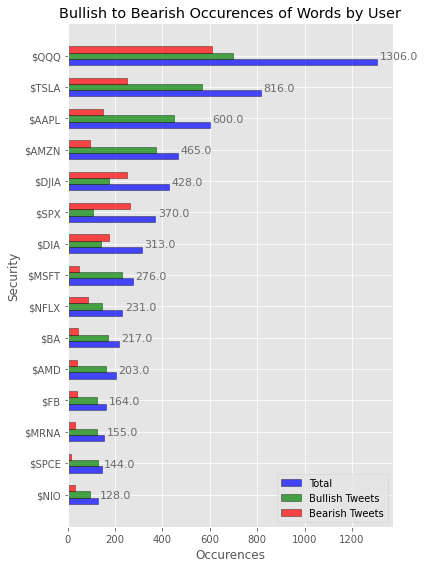

In [89]:
# Create Bar Chart of user and occurences
y_security = results1['Security'].tolist()
y_security.reverse()

y_indexes = np.arange(len(y_security))
height = 0.2

x_bull = results1['Bullish Occurences'].tolist()
x_bear = results1['Bearish Occurences'].tolist()
x_total = results1['Total'].tolist()

x_bull.reverse()
x_bear.reverse()
x_total.reverse()

plt.figure(figsize=(6,8))

multi = plt.subplot()
rects1 = multi.barh(y_indexes - height, x_total, height = height, edgecolor='black',  color = 'blue', alpha = 0.7, label = 'Total')
rects2 = multi.barh(y_indexes, x_bull, height = height, edgecolor='black', color = 'green', alpha = 0.7, label = 'Bullish Tweets')
rects3 = multi.barh(y_indexes + height, x_bear, height = height, edgecolor='black' , color = 'red', alpha = 0.7, label = 'Bearish Tweets')

plt.xlabel('Occurences')
plt.ylabel('Security')
plt.yticks(ticks = y_indexes, labels = y_security)
plt.title('Bullish to Bearish Occurences of Words by User')

# set individual bar lables using above list
for i in rects1:
    # get_width pulls left or right; get_y pushes up or down
    plt.text(i.get_width() + 10, i.get_y() + .18, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

plt.legend()
plt.tight_layout()
plt.show()

In [90]:
# Restrict total amount of values
results = results.sort_values(by='Total', ascending= False)
results2 = results
results2

,Security,Bullish Occurences,Bullish Percentages,Bearish Occurences,Bearish Percentages,Total
11,$QQQ,699.0,0.535222,607.0,0.464778,1306.0
17,$TSLA,565.0,0.692402,251.0,0.307598,816.0
46,$AAPL,450.0,0.750000,150.0,0.250000,600.0
54,$AMZN,372.0,0.800000,93.0,0.200000,465.0
27,$DJIA,176.0,0.411215,252.0,0.588785,428.0
...,...,...,...,...,...,...
1343,$280m,NaN,0.000000,1.0,1.000000,1.0
1344,$BYD,NaN,0.000000,1.0,1.000000,1.0
1346,$145,NaN,0.000000,1.0,1.000000,1.0
1347,$110,NaN,0.000000,1.0,1.000000,1.0


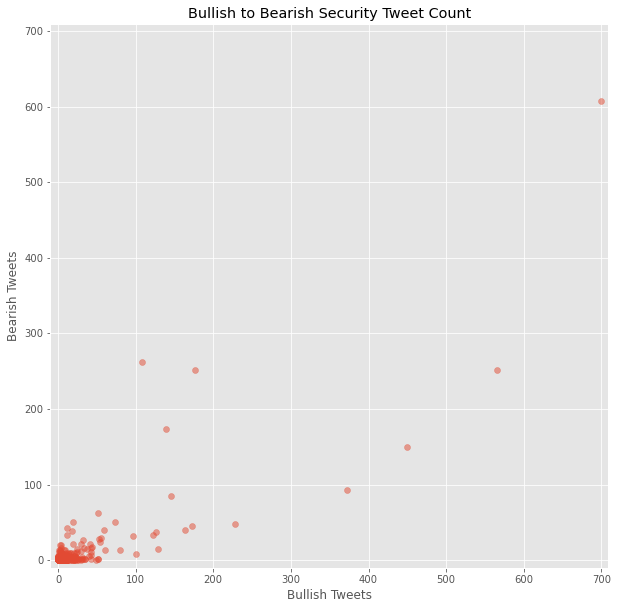

In [124]:
# Plot the Scatter Graph
results2 = results2.fillna(0)
x_bull = results2['Bullish Occurences'].tolist()
y_bear = results2['Bearish Occurences'].tolist()

plt.figure(figsize=(10,10))

plt.title('Bullish to Bearish Security Tweet Count')
plt.xlabel('Bullish Tweets')
plt.ylabel('Bearish Tweets')

plt.scatter(x_bull, y_bear, alpha = 0.5)

# Find maximum plot value of bullish or bearish tweets
if max(x_bull) >= max(y_bear):
    plt.xlim(-10, max(x_bull) + 10)
    plt.ylim(-10, max(x_bull) + 10)
else:
    plt.xlim(-10, max(y_bear) + 10)
    plt.ylim(-10, max(y_bear) + 10)

plt.show()

In [116]:
#filtering tweets for 20 + tweets by security and over 80% lean towards bullish or Bearish
results_filtered = results['Total'] >= 20
results3 = results[results_filtered]

high_bullish = results3['Bullish Percentages'] >= 0.8
results31 = results3[high_bullish]

high_bearish = results3['Bearish Percentages'] >= 0.8
results32 = results3[high_bearish]

results_filtered = pd.concat([results31, results32])

In [120]:
results_filtered = results_filtered.sort_values(by='Total', ascending= False)
results4 = results_filtered.head(15)

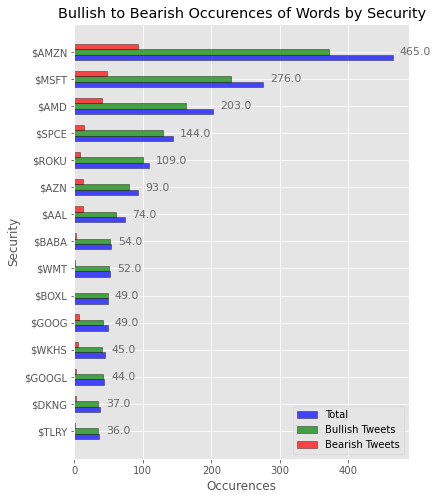

In [121]:
# Create Filtered Bar Chart
y_security = results4['Security'].tolist()
y_security.reverse()

y_indexes = np.arange(len(y_security))
height = 0.2

x_bull = results4['Bullish Occurences'].tolist()
x_bear = results4['Bearish Occurences'].tolist()
x_total = results4['Total'].tolist()

x_bull.reverse()
x_bear.reverse()
x_total.reverse()

plt.figure(figsize=(6,8))

multi = plt.subplot()
rects1 = multi.barh(y_indexes - height, x_total, height = height, edgecolor='black',  color = 'blue', alpha = 0.7, label = 'Total')
rects2 = multi.barh(y_indexes, x_bull, height = height, edgecolor='black', color = 'green', alpha = 0.7, label = 'Bullish Tweets')
rects3 = multi.barh(y_indexes + height, x_bear, height = height, edgecolor='black' , color = 'red', alpha = 0.7, label = 'Bearish Tweets')

plt.xlabel('Occurences')
plt.ylabel('Security')
plt.yticks(ticks = y_indexes, labels = y_security)
plt.title('Bullish to Bearish Occurences of Words by Security')

# set individual bar lables using above list
for i in rects1:
    # get_width pulls left or right; get_y pushes up or down
    plt.text(i.get_width() + 10, i.get_y() + .18, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

plt.legend()
plt.show()

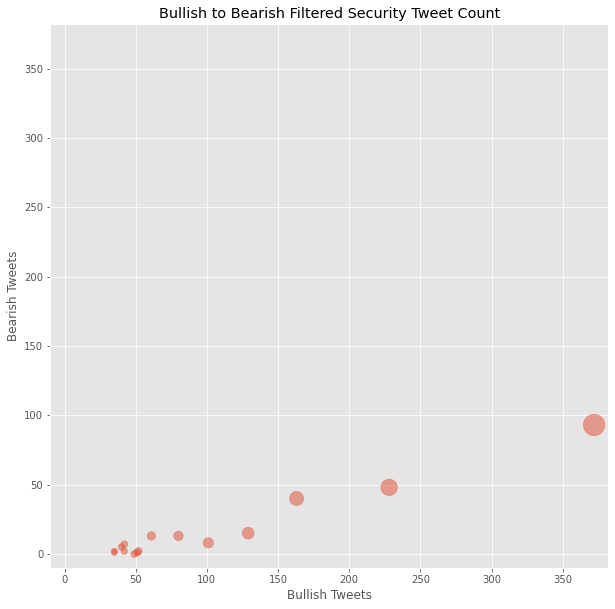

In [123]:
# Plot the Scatter Graph
results4 = results4.fillna(0)
x_bull = results4['Bullish Occurences'].tolist()
y_bear = results4['Bearish Occurences'].tolist()
s_total = results4['Total'].tolist()

plt.figure(figsize=(10,10))

plt.title('Bullish to Bearish Filtered Security Tweet Count')
plt.xlabel('Bullish Tweets')
plt.ylabel('Bearish Tweets')

plt.scatter(x_bull, y_bear, s = s_total, alpha = 0.5)

# Find maximum plot value of bullish or bearish tweets
if max(x_bull) >= max(y_bear):
    plt.xlim(-10, max(x_bull) + 10)
    plt.ylim(-10, max(x_bull) + 10)
else:
    plt.xlim(-10, max(y_bear) + 10)
    plt.ylim(-10, max(y_bear) + 10)

plt.show()

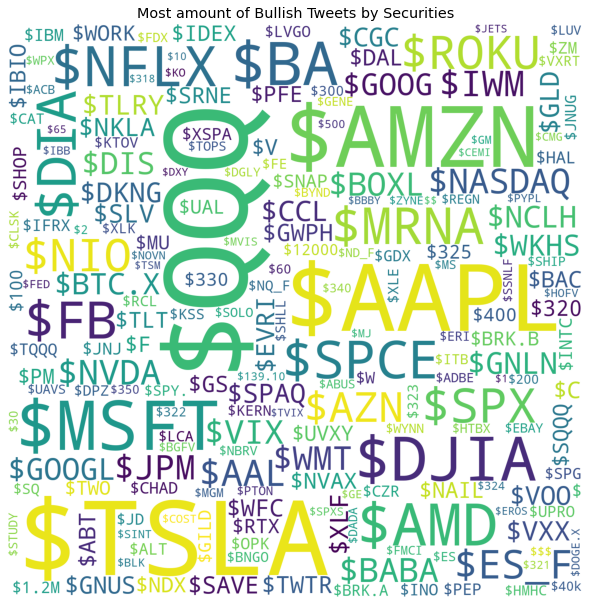

In [132]:
# Bullish User Word Cloud
word_freq = results.set_index('Security')['Bullish Occurences'].to_dict()

wordcloud = WordCloud(width = 1500, 
                height = 1500, 
                background_color ='white',
                max_words = 800,
                max_font_size = 300, 
                min_font_size = 10).generate(str(results['Security'])) 

wordcloud.generate_from_frequencies(word_freq)
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('Most amount of Bullish Tweets by Securities')
  
plt.show() 

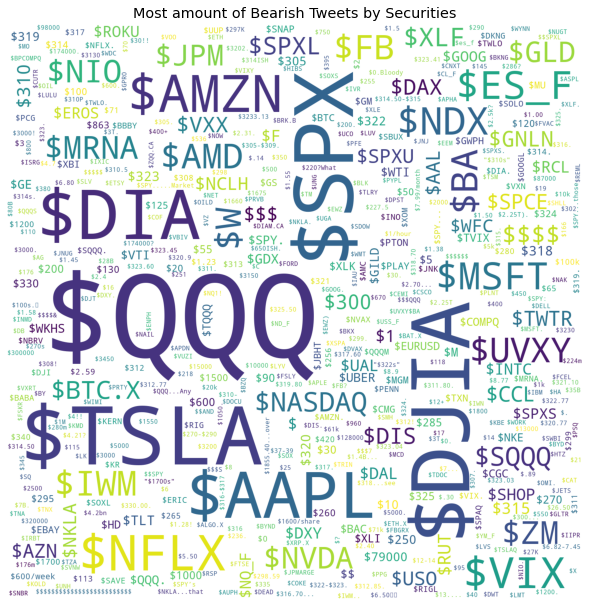

In [133]:
# Bullish User Word Cloud
word_freq = results.set_index('Security')['Bearish Occurences'].to_dict()

wordcloud = WordCloud(width = 1500, 
                height = 1500, 
                background_color ='white',
                max_words = 800,
                max_font_size = 300, 
                min_font_size = 10).generate(str(results['Security'])) 

wordcloud.generate_from_frequencies(word_freq)
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('Most amount of Bearish Tweets by Securities')
  
plt.show() 